<a href="https://colab.research.google.com/github/combont/Rproject/blob/master/DFS%20BFS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# DFS, BFS
## 파이썬에서 스택은 기본 리스트를 활용
stack = []

stack.append(5)
stack.append(2)

print(stack)
print(stack[::-1])

stack.pop()
stack.pop()


[5, 2]
[2, 5]


5

In [4]:
# 큐
from collections import deque

queue = deque()

queue.append(5)
queue.append(2)
queue.append(3)
queue.append(7)
queue.popleft()
queue.append(1)
queue.popleft()

print(queue) # 들어온 순서대로 출력
queue.reverse()
print(queue) # 나중에 들어온 순서대로 출력

# 큐를 리스트로 변환
print(list(queue))

deque([3, 7, 1])
deque([1, 7, 3])
[1, 7, 3]


In [ ]:
# 재귀함수 예제(팩토리얼)
def factorial_recursive(n):
  if n <= 1:
    return 1
  
  return n * factorial_recursive(n-1)

In [5]:
# DFS 깊이우선탐색
# DFS는 스택을 이용하는 알고리즘이기 때문에 실제 구현은 재귀함수 사용

# 인접 리스트로 표현한 그래프
graph = [
    [],
    [2,3,8],
    [1,7],
    [1,4,5],
    [3,5],
    [3,4],
    [7],
    [2,6,8],
    [1,7]
]

# 각 노드가 방문한 정보를 리스트로 표현
visited = [False] * 9


def dfs(graph, v, visited):
  # 현재노드 방문처리
  visited[v] = True
  print(v, end=' ')

  # 현재 노드와 연결된 다른 노드 재귀적으로 방문
  for i in graph[v]:
    if not visited[i]:
      dfs(graph, i, visited)


dfs(graph, 1, visited)

1 2 7 6 8 3 4 5 

In [6]:
# BFS 너비 우선 탐색
## 큐 자료구조 이용(deque), 가까운 노드부터 탐색
## 보통 DFS 보다 빠름

from collections import deque

# 인접 리스트로 표현한 그래프
graph = [
    [],
    [2,3,8],
    [1,7],
    [1,4,5],
    [3,5],
    [3,4],
    [7],
    [2,6,8],
    [1,7]
]

# 각 노드가 방문한 정보를 리스트로 표현
visited = [False] * 9

def bfs(graph, start, visited):
  queue = deque([start])

  # 현재노드 방문처리
  visited[start] = True

  # 큐가 빌 때까지 반복
  while queue:
    v= queue.popleft()
    print(v, end=' ')

    # 해당 원소와 연결된, 방문하지 않은 원소 큐에 삽입
    for i in graph[v]:
      if not visited[i]:
        queue.append(i)
        visited[i] = True

bfs(graph, 1, visited)

1 2 3 8 7 4 5 6 

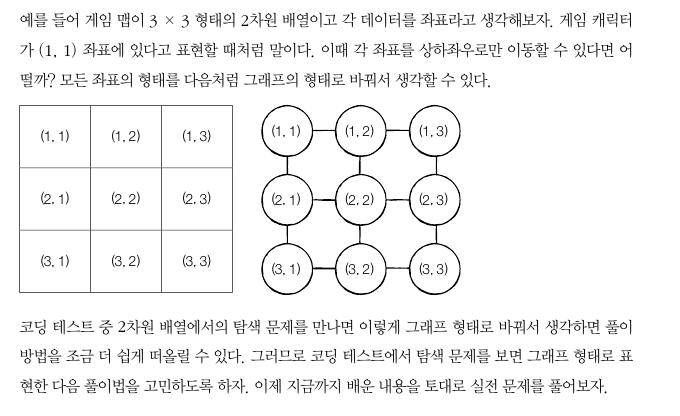

In [ ]:
# 음료수 얼려먹기(할 수 있는 경우의 수?)
## n*m 크기의 얼음틀
## 구멍이 뚫린 부분 0, 칸막이 존재 1
## 구멍이 뚤린 부분으로 만들어지는 얼음 틀 모양으로 생성되는 아이스크림 개수
## 입력값 : n*m, n*m 2차원 리스트
def solution(n,m, graph):

  # DFS로 특정 노드를 방문한 뒤 연결된 모든 노드들도 방문
  def dfs(x, y):
    # 주어진 범위를 벗어나는 경우 즉시 종료
    if x <= -1 or x >= n or y <= -1 or y >= m:
      return False
    
    # 현재 노드를 아직 방문하지 않았다면
    if graph[x][y] == 0:
      # 해당 노드 방문처리
      graph[x][y] = 1

      # 상, 하, 좌, 우 위치 모두 재귀적으로 호출
      dfs(x-1, y)
      dfs(x+1, y)
      dfs(x, y-1)
      dfs(x, y+1)
      return True
    return False

  # 모든 노드에 대해 음료수 채우기
  result = 0
  for i in range(n):
    for j in range(m):
      # 현재 위치에서 DFS 수행
      if dfs(i,j) == True:
        result += 1
  
  return result

In [ ]:
# 미로 탈출(최소 경로)
## 미로 탈출을 위해 움직여야 하는 최소 칸의 개수
## 입력값 : n*m, n*m 2차원 리스트
from collections import deque

def solution(n,m,graph):
  # 이동할 네 방향 정의(상,하,좌,우)
  dx = [-1, 1, 0, 0]
  dy = [0, 0, -1, 1]

  # BFS 구현
  def bfs(x,y):
    queue = deque()
    queue.append((x,y))

    # 큐가 빌 때까지 반복
    while queue:
      x,y = queue.popleft()

      # 현재 위치에서 네 방향으로 위치 확인
      for i in range(4):
        nx = x + dx[i]
        ny = y + dy[i]

        # 공간 벗어난 경우 무시
        if nx < 0 or ny < 0 or nx >= n or ny >=m:
          continue
        
        # 벽인 경우 무시
        if graph[nx][ny] == 0:
          continue

        # 해당 노드를 처음 방문하는 경우에만 최단거리 기록
        if graph[nx][ny] == 1:
          graph[nx][ny] = graph[x][y] + 1
          queue.append((nx,ny))
    
    # 가장 오른쪽 아래까지의 최단 거리 반환
    return graph[n-1][m-1]

  # BFS 수행결과 리턴
  return(bfs(0,0))